# Identificar fronteras lineales

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, Y = make_circles(100, factor=0.1, noise=0.1)

In [3]:
def plt_svc(model, ax=None, plot_support=True):
    """
    Plot de la función de decisión para una clasificación en 2D con SVC
    """
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Generamos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy, xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Representamos las fronteras y los márgenes del SVC
    ax.contour(X, Y, P, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors="black")
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

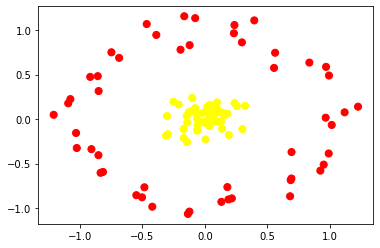

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="autumn")
plt.show()

In [5]:
from sklearn.svm import SVC

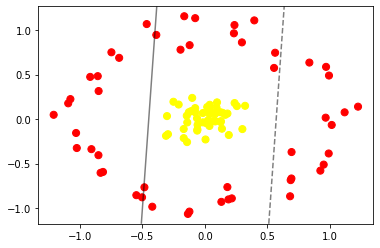

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X, Y), plot_support=False)

In [7]:
r = np.exp(-(X**2).sum(1))

In [8]:
r

array([0.99547881, 0.33683238, 0.33525514, 0.91698394, 0.91610781,
       0.25030394, 0.99772207, 0.52473622, 0.97982889, 0.31421134,
       0.3892401 , 0.28295301, 0.91139899, 0.43903696, 0.98290928,
       0.95988672, 0.97798511, 0.43221766, 0.27556633, 0.99736494,
       0.99608447, 0.99168911, 0.98300837, 0.88101856, 0.94906327,
       0.97116432, 0.35928875, 0.53758661, 0.31632414, 0.97868616,
       0.43602884, 0.41446374, 0.35695853, 0.97799621, 0.41053782,
       0.35354116, 0.99512316, 0.98145976, 0.34607002, 0.97478288,
       0.90396976, 0.52807371, 0.97910965, 0.21683728, 0.99229176,
       0.3438302 , 0.39103481, 0.44059023, 0.96369583, 0.35221453,
       0.89071155, 0.30326797, 0.31857213, 0.99255146, 0.32554043,
       0.49480995, 0.29215929, 0.37977036, 0.9889194 , 0.23013062,
       0.32118873, 0.93542291, 0.25803314, 0.9744588 , 0.42787089,
       0.30997952, 0.29578416, 0.2752985 , 0.38931788, 0.98940103,
       0.96987356, 0.37471915, 0.36165177, 0.29809265, 0.98020

In [9]:
from mpl_toolkits import mplot3d

In [10]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:, 0], X[:, 1], r, c=Y, s=50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

In [11]:
from ipywidgets import interact, fixed

In [12]:
interact(plot_3D, elev=[-90, -60, -30, 0, 30, 60, 90],
         azim=[-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180],
         X=fixed(X), Y=fixed(Y), r = fixed(r))
plt.show()

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…